# Probability Practices in Python

### Table of Contents

- [Simulating Coins Flipping Using `np.random.randint` and `np.random.choice()`](#simCoinFlip)
- [Coin Flips and Die Rolls](#CoinFlips&DieRolls)
- [Simulating Many Coin Flips](#Sim_Many_CoinFlips)
- [Binomial Distribution Simulation Using `np.random.binomial()`](#binomial_distribution)
- [Cancer Test Results](#cancer_test)
- [Conditional Probability & Bayes Rule](#conditional_probability&bayes_rules)

In [1]:
import os
os.chdir("projects_on_GitHub/POC/python_probability_practices")

In [2]:
ls

Probability_Practices_Using_Python.ipynb
cancer_test_data.csv


<a id=simCoinFlip></a>
## Simulating Coins Flipping Using `np.random.randint` and `np.random.choice()`

In [3]:
# outcome of one coin flip
np.random.randint(2)

0

In [4]:
# outcomes of ten thousand coin flips
np.random.randint(2, size=10000)

array([1, 1, 1, ..., 0, 0, 0])

In [5]:
# mean outcome of ten thousand coin flips
np.random.randint(2, size=10000).mean()

0.5046

In [6]:
# outcome of one coin flip
np.random.choice([0, 1])

1

In [7]:
# outcome of ten thousand coin flips
np.random.choice([0, 1], size=10000)

array([1, 1, 0, ..., 1, 0, 1])

In [8]:
# mean outcome of ten thousand coin flips
np.random.choice([0, 1], size=10000).mean()

0.4974

In [9]:
# outcomes of ten thousand biased coin flips
np.random.choice([0, 1], size=10000, p=[0.8, 0.2])

array([0, 0, 0, ..., 0, 0, 1])

In [10]:
# mean outcome of ten thousand biased coin flips
np.random.choice([0, 1], size=10000, p=[0.8, 0.2]).mean()

0.1953

<a id=CoinFlips&DieRolls></a>
## Coin Flips and Die Rolls

### Tasks
- Two fair coin flips produce exactly two heads
- Three fair coin flips produce exactly one head
- Three biased coin flips with P(H) = 0.6 produce exactly one head
- A die rolls an even number
- Two dice roll a double

<font color='blue'>
The Binomial Distribution Formula is as follows:<br>

$$
C_n^kp^{n}(1-p)^{n-k}
$$

Apply them in the following python codes:
</font>



In [11]:
def factorial(n):
    if n <= 1:
        return 1
    else:
        return n * factorial(n-1)

def combination(n, k):
    return factorial(n)/(factorial(k)*factorial(n-k))

def binomial(n, k, p):
    return combination(n, k) * p ** k * (1-p) ** (n-k)

We can validate the results using `np.random` against the mathematical solution using binomial formula.

### 1. Two fair coin flips produce exactly two heads

In [12]:
# simulate 1 million tests of two fair coin flips
tests = np.random.randint(2, size=(int(1e6), 2))
print("The first 5 simulation results: {}".format(tests[:5]))

# sums of all tests
test_sums = tests.sum(axis=1)
print("The first 5 summation: {}".format(test_sums[:5]))

# proportion of tests that produced exactly two heads
prop_result = (test_sums == 0).mean()
print("The proportion of tests that produced exactly two heads is : {}".format(prop_result))

The first 5 simulation results: [[1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]]
The first 5 summation: [2 2 0 1 1]
The proportion of tests that produced exactly two heads is : 0.250727


**Mathematical Solution:**

In [13]:
binomial(2, 2, .5)

0.25

### 2. Three fair coin flips produce exactly one head

In [14]:
# simulate 1 million tests of three fair coin flips
tests = np.random.choice([0, 1], size=(int(1e6), 3))

# sums of all tests
tests_sum = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(tests_sum == 2).mean()

0.374936

**Mathematical Solution:**

In [15]:
binomial(3, 1, .5)

0.375

### 3. Three biased coin flips with P(H) = 0.6 produce exactly one head

In [16]:
# simulate 1 million tests of three biased coin flips
tests = np.random.choice([0, 1], size=(int(1e6), 3), p=[.6, .4])

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums == 2).mean()

0.287542

**Mathematical Solution:**

In [17]:
binomial(3, 1, .6)

0.28800000000000003

<font color='red'><b><i>NOTICE: However we have built-in `np.random.binomial()` function.</i></b></font>

### 4. A die rolls an even number

In [18]:
# simulate 1 million tests of one die roll
tests = np.random.choice(range(1, 7), size=int(1e6))

# proportion of tests that produced an even number
(tests % 2 == 0).mean()

0.500809

### 5. Two dice roll a double

In [19]:
# simulate the first million die rolls
# first = np.random.choice(range(1, 7), size=(int(1e6), 2))
first = np.random.choice(range(1, 7), size=int(1e6))

# simulate the second million die rolls
second = np.random.choice(range(1, 7), size=int(1e6))

# proportion of tests where the 1st and 2nd die rolled the same number
(first == second).mean()

0.166107

<a id='Sim_Many_CoinFlips'></a>
## Simulating Many Coin Flips

In [20]:
# number of heads from 10 fair coin flips
np.random.binomial(10, 0.5)

5

In [21]:
# results from 20 tests with 10 coin flips
np.random.binomial(10, 0.5, 20)

array([2, 6, 9, 3, 7, 6, 6, 6, 6, 6, 6, 7, 4, 3, 8, 7, 4, 5, 7, 5])

In [22]:
# mean number of heads from the 20 tests
np.random.binomial(10, 0.5, 20).mean()

5.0

In [23]:
# reflects the fairness of the coin more closely as # tests increases
np.random.binomial(10, 0.5, 1000000).mean()

5.000386

### Visualization of Binomial Results

#### Pt.1. Flip 10 coins at a time, repeat 1,000,000 times. 

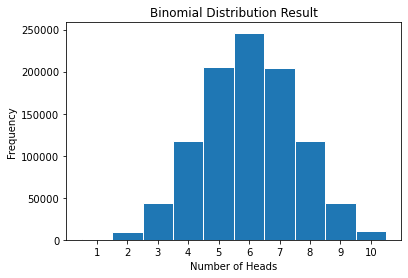

In [24]:
# Visualize the results
plt.hist(np.random.binomial(10, 0.5, 1000000), edgecolor='w')

# Reset x ticks
plt.xticks(np.arange(0.5, 10.5, 1), range(1, 11))

# Graph Properties
plt.title("Binomial Distribution Result")
plt.xlabel("Number of Heads")
plt.ylabel('Frequency');

#### Pt.2. Flip 100 coins at a time, repeat 1,000,000 times. 

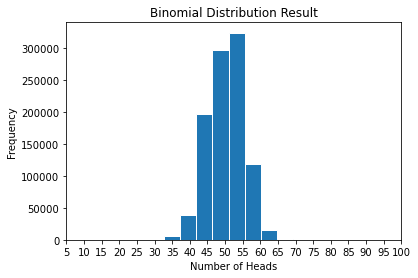

In [25]:
# Visualize the results
plt.hist(np.random.binomial(100, 0.5, 1000000), edgecolor='w')

# Reset x ticks
plt.xticks(range(5, 105, 5), range(5, 105, 5))

# Graph Properties
plt.title("Binomial Distribution Result")
plt.xlabel("Number of Heads")
plt.ylabel('Frequency');

<a id='binomial_distribution'></a>
## Binomial Distribution Simulation Using `np.random.binomial()`

**Tasks**
1. A fair coin flip produces heads
2. Five fair coin flips produce exactly one head
3. Ten fair coin flips produce exactly four heads
4. Five biased coin flips with P(H) = 0.8 produce exactly five heads
5. Ten biased coin flips with P(H) = 0.15 produce at least three heads

### 1. A fair coin flip produces heads

In [26]:
# simulate 1 million tests of one fair coin flip
# remember, the output of these tests are the # successes, or # heads
tests = np.random.binomial(1, 0.5, int(1e6))

# proportion of tests that produced heads
(tests == 1).mean()

0.500091

#### Mathematical Solution

In [27]:
binomial(1, 1, .5)

0.5

### 2. Five fair coin flips produce exactly one head

In [28]:
# simulate 1 million tests of five fair coin flips
tests = np.random.binomial(5, .5, size=int(1e6))

# proportion of tests that produced 1 head
(tests == 1).mean()

0.156089

#### Mathematical Solution

In [29]:
binomial(5, 1, .5)

0.15625

### 3. Ten fair coin flips produce exactly four heads

In [30]:
# simulate 1 million tests of ten fair coin flips
tests = np.random.binomial(10, .5, size=int(1e6))

# proportion of tests that produced 4 heads
(tests == 4).mean()

0.204763

#### Mathematical Solution

In [31]:
binomial(10, 4, .5)

0.205078125

### 4. Five biased coin flips with P(H) = 0.8 produce exactly five heads

In [32]:
# simulate 1 million tests of five biased coin flips
tests = np.random.binomial(5, p=.8, size=int(1e6))

# proportion of tests that produced 5 heads
(tests == 5).mean()

0.327503

#### Mathematical Solution

In [33]:
binomial(5, 5, .8)

0.3276800000000001

### 5. Ten biased coin flips with P(H) = 0.15 produce at least 3 heads

In [34]:
# simulate 1 million tests of ten biased coin flips
tests = np.random.binomial(10, p=.15, size=int(1e6))

# proportion of tests that produced at least 3 heads
(tests >= 3).mean()

0.180129

#### Mathematical Solution

In [35]:
1- (binomial(10, 0, .15) + binomial(10, 1, .15) + binomial(10, 2, .15))

0.17980351963242214

<a id='cancer_test'></a>
## Cancer Test Results

**Questions**
- How many patients are there in total?
- How many patients have cancer?
- How many patients do not have cancer?
- What proportion of patients have cancer?
- What proportion of patients don't have cancer?
- What proportion of patients with cancer test positive?
- What proportion of patients with cancer test negative?
- What proportion of patients without cancer test positive?
- What proportion of patients without cancer test negative?

In [36]:
# load dataset
cancer_df = pd.read_csv("cancer_test_data.csv")
cancer_df.head()


,patient_id,test_result,has_cancer
0,79452,Negative,False
1,81667,Positive,True
2,76297,Negative,False
3,36593,Negative,False
4,53717,Negative,False


In [37]:
# number of patients
num_patients = cancer_df.shape[0]

print("There are {} patients in total.".format(num_patients))

There are 2914 patients in total.


In [38]:
# number of patients with cancer
cancer_patients = cancer_df[cancer_df.has_cancer==True]
num_cancer = cancer_patients.shape[0]

print("There are {} patients with cancer.".format(num_cancer))

There are 306 patients with cancer.


In [39]:
# number of patients without cancer
free_patients = cancer_df[cancer_df.has_cancer==False]
num_cancer_free = free_patients.shape[0]

print("There are {} patients without cancer.".format(num_cancer_free))

There are 2608 patients without cancer.


In [40]:
# proportion of patients with cancer
prop_cancer = num_cancer / num_patients
#prop_cancer = (cancer_df.has_cancer==True).mean()

print("The proportion of patients with cancer is {:.3f}.".format(prop_cancer))

The proportion of patients with cancer is 0.105.


In [41]:
# proportion of patients without cancer
# prop_cancerFree = (cancer_df.has_cancer==False).mean()
print("The proportion of patients without cancer is {:.3f}.".format(1 - prop_cancer))

The proportion of patients without cancer is 0.895.


In [42]:
# proportion of patients with cancer who test positive
prop_can_pos = (cancer_patients.test_result == 'Positive').mean()
prop_can_pos

0.9052287581699346

In [43]:
# proportion of patients with cancer who test negative
prop_can_neg = (cancer_patients.test_result == 'Negative').mean()
prop_can_neg

0.09477124183006536

In [44]:
# proportion of patients without cancer who test positive
prop_free_pos = (free_patients.test_result == 'Positive').mean()
prop_free_pos

0.2036042944785276

In [45]:
# proportion of patients without cancer who test negative
prop_free_neg = (free_patients.test_result == 'Negative').mean()
prop_free_neg

0.7963957055214724

<a id='conditional_probability&bayes_rules'></a>
## Conditional Probability & Bayes Rule

**术语**
- 先验概率 prior probability
- 后验概率 posterior probability
- 敏感度 sensitivity
- 特异度 specificity
- 联合概率 joint probability
- 全概率 total probability

$$
P(cancer|positive)=\frac{P(positive|cancer)*P(cancer)}{P(positive|cancer)*P(cancer)+P(positive|\neg cancer)*P(\neg cancer)}
$$

**Questions**

1. Probability a patient who tested positive has cancer, or `P(cancer|positive)`
2. Probability a patient who tested positive doesn't have cancer, or `P(~cancer|positive)`
3. Probability a patient who tested negative has cancer, or `P(cancer|negative)`
4. Probability a patient who tested negative doesn't have cancer, or `P(~cancer|negative)`

___NOTICE: This exercise needs results from the previous part.___

In [46]:
# load dataset
cancer_df = pd.read_csv("cancer_test_data.csv")
cancer_df.head()



,patient_id,test_result,has_cancer
0,79452,Negative,False
1,81667,Positive,True
2,76297,Negative,False
3,36593,Negative,False
4,53717,Negative,False


In [47]:
def posterior(prior, sensitivity, specificity):
    oppo_prior = 1 - prior
    oppo_sensitivity = 1 - sensitivity
    oppo_specificity = 1 - specificity
    total_p = prior*sensitivity + oppo_prior*oppo_specificity
    return prior*sensitivity / total_p
        

In [48]:
# What proportion of patients who tested positive have cancer? -- P(cancer|positive)
prior = (cancer_df.has_cancer==True).mean()
sensitivity = (cancer_df[cancer_df.has_cancer==True].test_result=='Positive').mean()
specificity = (cancer_df[cancer_df.has_cancer==False].test_result=='Negative').mean()

posterior(prior, sensitivity, specificity)

0.34282178217821785

In [49]:
# What proportion of patients who tested positive don't have cancer?
1 - posterior(prior, sensitivity, specificity)

0.6571782178217822

In [50]:
# What proportion of patients who tested negative have cancer? -- P(cancer|negative)
prior = (cancer_df.has_cancer==True).mean()
sensitivity = (cancer_df[cancer_df.has_cancer==True].test_result=='Negative').mean()
specificity = (cancer_df[cancer_df.has_cancer==False].test_result=='Positive').mean()

posterior(prior, sensitivity, specificity)

0.013770180436847102

In [51]:
# What proportion of patients who tested negative don't have cancer?
1 - posterior(prior, sensitivity, specificity)

0.9862298195631529